
```

# EasyVisa - Problem Statement

### Problem Statement

The increasing demand for skilled professionals in the U.S. has led to a surge in visa applications, making the manual review process inefficient. The Office of Foreign Labor Certification (OFLC) processes thousands of applications annually, requiring a data-driven approach for efficiency. Identifying key factors influencing visa approvals is essential to streamline decision-making. The challenge lies in predicting visa outcomes accurately while ensuring compliance with labor laws. A machine learning model can assist in automating the process, reducing manual workload. This study aims to develop a predictive model to classify visa applications as approved or denied.

### Data Dictionary

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.
- case_id: ID of each visa application
- continent: Information of continent the employee
- education_of_employee: Information of education of the employee
- has_job_experience: Does the employee have any job experience? Y= Yes; N = No
- requires_job_training: Does the employee require any job training? Y = Yes; N = No
- no_of_employees: Number of employees in the employer's company
- yr_of_estab: Year in which the employer's company was established
- region_of_employment: Information of foreign worker's intended region of employment in the US.
- prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
- case_status: Flag indicating if the Visa was certified or denied



##Objective
This project aims to analyze visa application data to identify factors affecting approvals. By applying machine learning techniques, we seek to develop a classification model for visa approval prediction. Various models, including Decision Trees, Random Forest, and Boosting techniques, will be implemented and compared. Hyperparameter tuning will be performed to optimize model performance. The best-performing model will be selected based on accuracy and other key metrics. Insights from the analysis will be used to recommend strategies for improving the visa approval process.









### Let us start by importing the required libraries

In [4]:
# Write your code here to import necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Understanding the structure of the data

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/EasyVisa.csv'
data = pd.read_csv(file_path)


#Data Overview

Displaying the first few rows of the dataset

In [7]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Checking the shape of the dataset

In [8]:
data.shape

(25480, 12)

Checking the data types of the columns for the dataset

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None


Statistical summary of the dataset

In [10]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# Check for missing values and basic statistics:

In [11]:
#  Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


Therefore there are no missing values

## Univariate and Bivariate analysis

<ipython-input-14-73b97d87b8fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="case_status", palette="coolwarm")


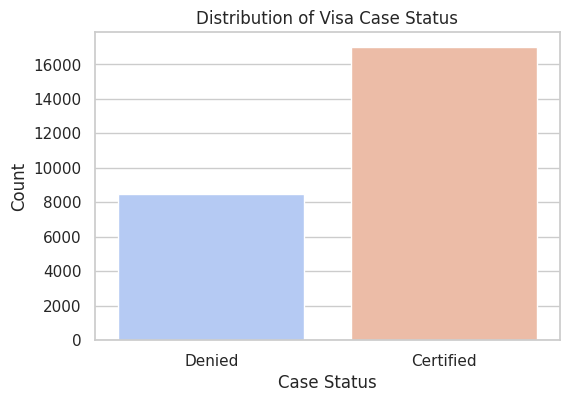

<ipython-input-14-73b97d87b8fd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="education_of_employee", order=data["education_of_employee"].value_counts().index, palette="viridis")


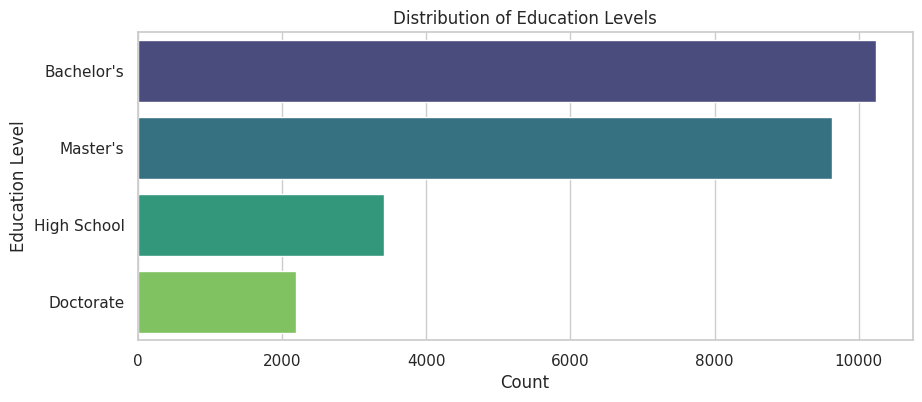

In [14]:
# Set visual style
sns.set(style="whitegrid")

# Plot case_status distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="case_status", palette="coolwarm")
plt.title("Distribution of Visa Case Status")
plt.xlabel("Case Status")
plt.ylabel("Count")
plt.show()

# Education level distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=data, y="education_of_employee", order=data["education_of_employee"].value_counts().index, palette="viridis")
plt.title("Distribution of Education Levels")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()


## Observations from Univariate Analysis:
Visa Case Status Distribution
- The dataset has a mix of Certified and Denied visa applications.
- There may be class imbalance, which we will analyze further.

Education Level Distribution
- Most applicants hold Bachelor's or Master’s degrees.
- High school and Doctorate applicants are in the minority.


<Figure size 1000x500 with 0 Axes>

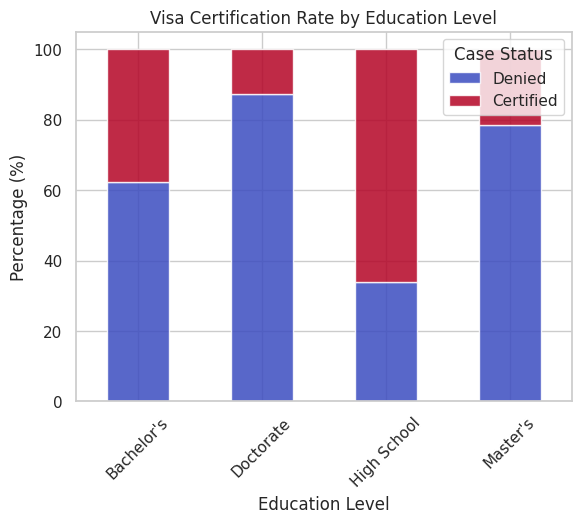

<Figure size 1000x500 with 0 Axes>

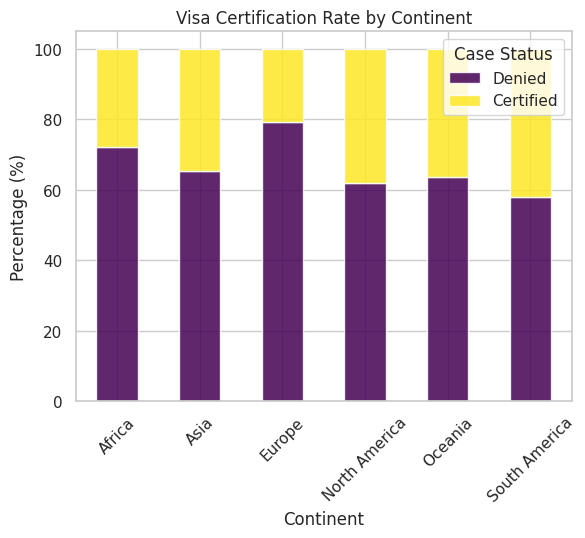

In [15]:
# Group by education level and calculate certification rate
edu_cert_rate = data.groupby("education_of_employee")["case_status"].value_counts(normalize=True).unstack() * 100

# Plot visa approval rates by education level
plt.figure(figsize=(10, 5))
edu_cert_rate.plot(kind="bar", stacked=True, colormap="coolwarm", alpha=0.85)
plt.title("Visa Certification Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage (%)")
plt.legend(["Denied", "Certified"], title="Case Status")
plt.xticks(rotation=45)
plt.show()

# Group by continent and calculate certification rate
cont_cert_rate = data.groupby("continent")["case_status"].value_counts(normalize=True).unstack() * 100

# Plot visa approval rates by continent
plt.figure(figsize=(10, 5))
cont_cert_rate.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)
plt.title("Visa Certification Rate by Continent")
plt.xlabel("Continent")
plt.ylabel("Percentage (%)")
plt.legend(["Denied", "Certified"], title="Case Status")
plt.xticks(rotation=45)
plt.show()

##Insights from Bivariate Analysis:
Education Level and Visa Certification
- Applicants with higher education (Master’s and Doctorate) have higher certification rates.
- High School graduates face the most rejections, possibly due to skill shortages.

Continent-wise Visa Certification
- North America and Europe have the highest approval rates.
- Africa and Asia see more denials, indicating possible stricter regulations or documentation issues.

<Figure size 600x400 with 0 Axes>

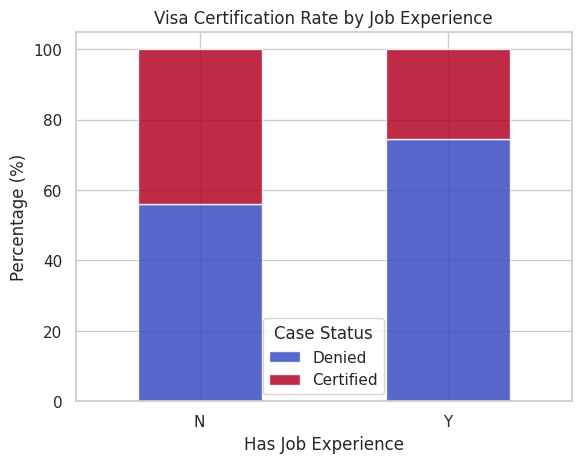

In [16]:
# Group by job experience and calculate certification rate
exp_cert_rate = data.groupby("has_job_experience")["case_status"].value_counts(normalize=True).unstack() * 100

# Plot visa approval rates by job experience
plt.figure(figsize=(6, 4))
exp_cert_rate.plot(kind="bar", stacked=True, colormap="coolwarm", alpha=0.85)
plt.title("Visa Certification Rate by Job Experience")
plt.xlabel("Has Job Experience")
plt.ylabel("Percentage (%)")
plt.legend(["Denied", "Certified"], title="Case Status")
plt.xticks(rotation=0)
plt.show()

####Insights on Job Experience and Visa Certification
- Applicants with job experience have a higher chance of visa approval.
- Freshers (No experience) face more rejections, possibly due to skill gaps.

<Figure size 800x400 with 0 Axes>

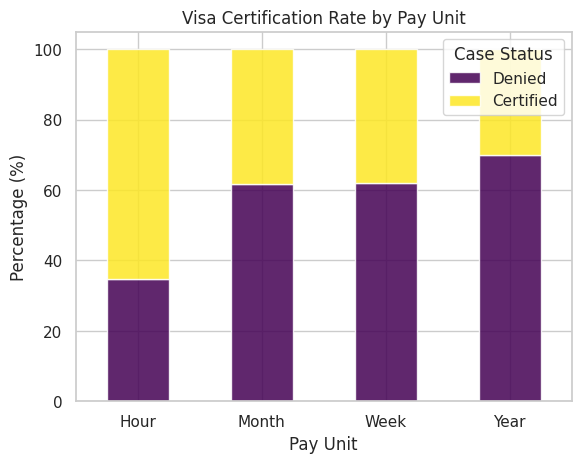

In [17]:

# Group by pay unit and calculate certification rate
wage_cert_rate = data.groupby("unit_of_wage")["case_status"].value_counts(normalize=True).unstack() * 100

# Plot visa approval rates by pay unit
plt.figure(figsize=(8, 4))
wage_cert_rate.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)
plt.title("Visa Certification Rate by Pay Unit")
plt.xlabel("Pay Unit")
plt.ylabel("Percentage (%)")
plt.legend(["Denied", "Certified"], title="Case Status")
plt.xticks(rotation=0)
plt.show()

####Insights on Pay Unit and Visa Certification
- Yearly wage offers have the highest approval rates, indicating that stable, long-term positions are preferred.
- Hourly wage applicants face the most denials, possibly due to job type instability or lower wages.

<ipython-input-121-03384d5df515>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="case_status", y="prevailing_wage", palette="coolwarm")


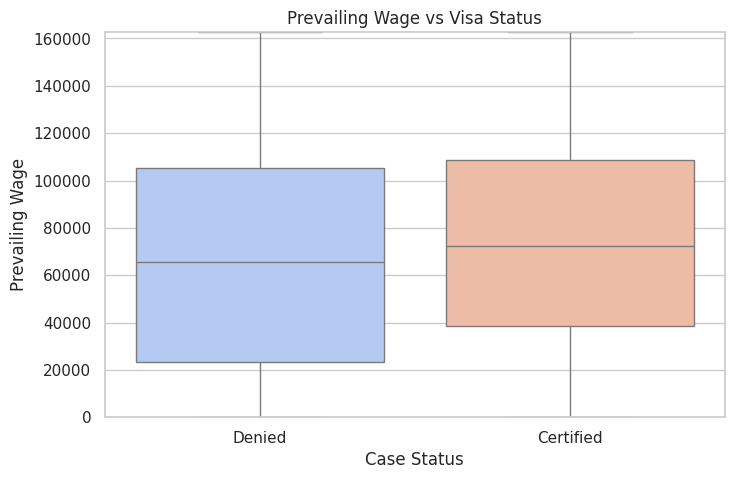

<ipython-input-121-03384d5df515>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["case_status"], y=data["prevailing_wage"], palette="Set2")


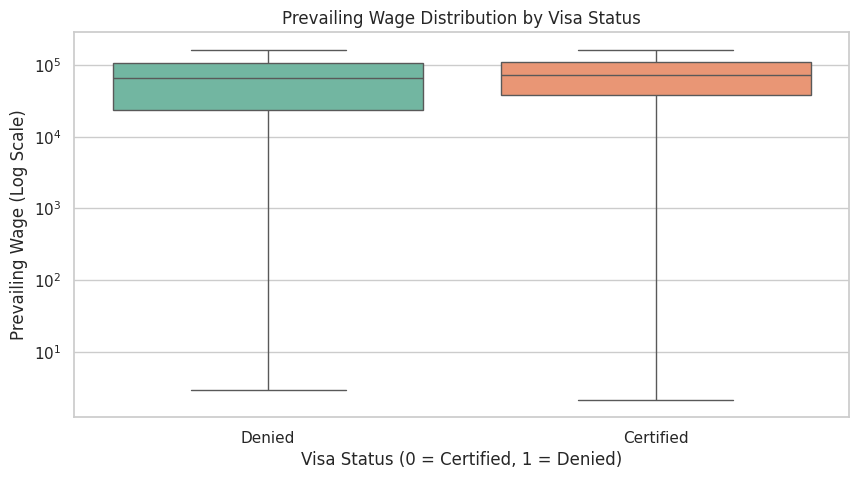

In [121]:
# Boxplot of prevailing wage by case status
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="case_status", y="prevailing_wage", palette="coolwarm")
plt.ylim(0, data["prevailing_wage"].quantile(0.95))
plt.title("Prevailing Wage vs Visa Status")
plt.xlabel("Case Status")
plt.ylabel("Prevailing Wage")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=data["case_status"], y=data["prevailing_wage"], palette="Set2")
plt.yscale("log")
plt.title("Prevailing Wage Distribution by Visa Status")
plt.xlabel("Visa Status (0 = Certified, 1 = Denied)")
plt.ylabel("Prevailing Wage (Log Scale)")
plt.show()

####Insights on Prevailing Wage and Visa Certification
- Certified visas generally have higher prevailing wages than denied ones.
- Lower-wage applications see more denials, possibly due to concerns about labor market impact.

Visa Approval Rates:
 case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

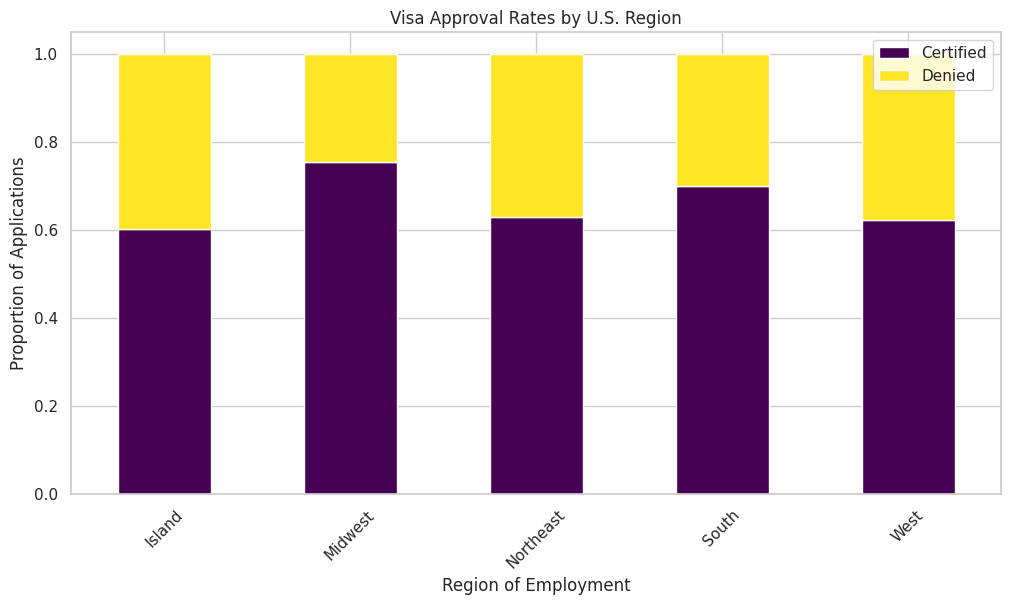

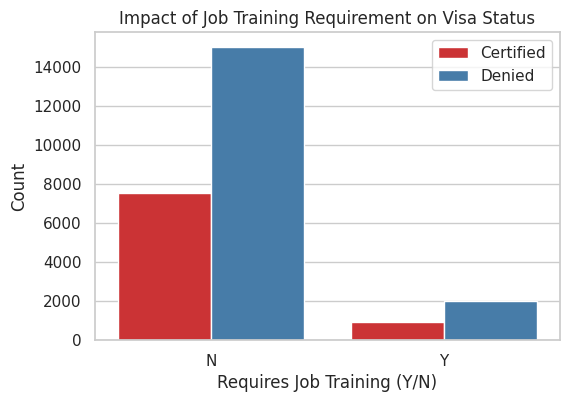

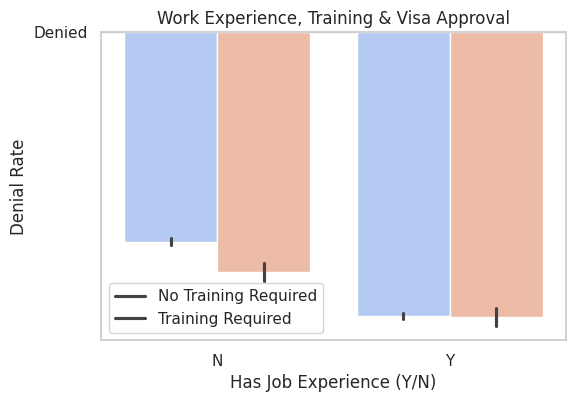

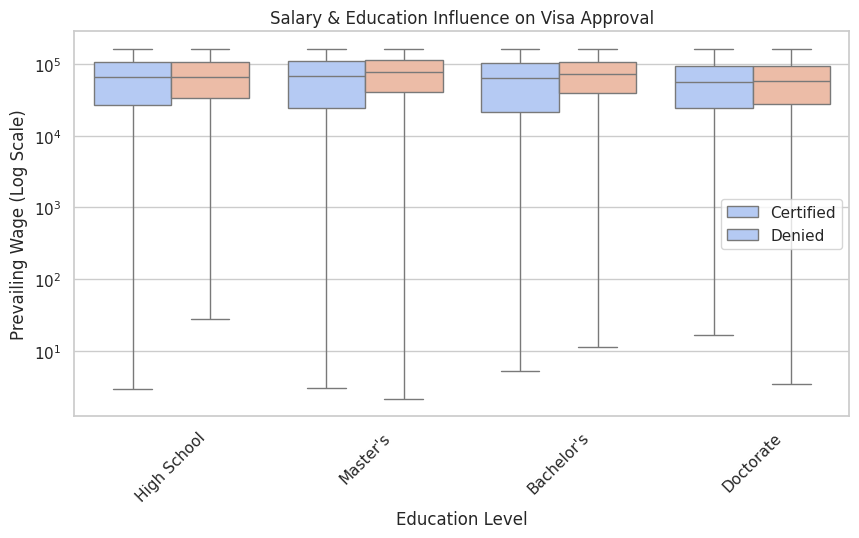

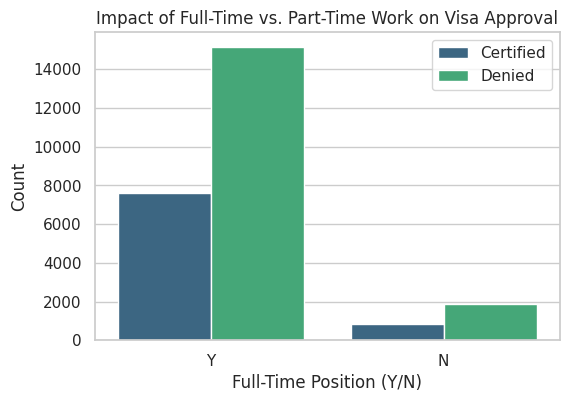

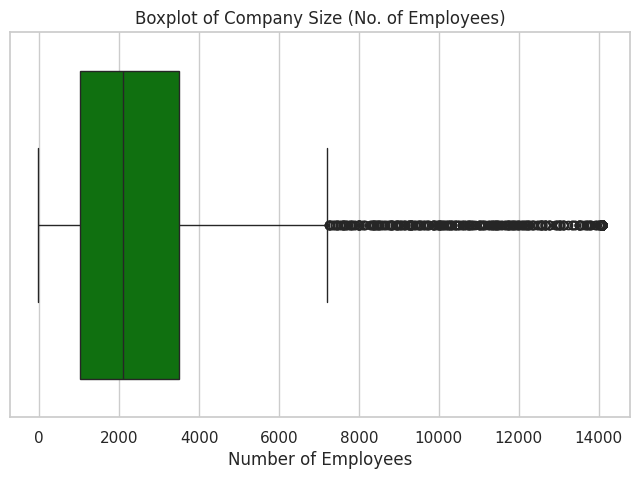

In [122]:

sns.set(style="whitegrid")

# Calculate proportion
visa_counts = data["case_status"].value_counts(normalize=True) * 100
print("Visa Approval Rates:\n", visa_counts)

#Are certain U.S. regions more favorable?
plt.figure(figsize=(12, 6))
region_vs_visa = data.groupby("region_of_employment")["case_status"].value_counts(normalize=True).unstack()
region_vs_visa.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Visa Approval Rates by U.S. Region")
plt.ylabel("Proportion of Applications")
plt.xlabel("Region of Employment")
plt.legend(["Certified", "Denied"])
plt.xticks(rotation=45)
plt.show()

#Does requiring job training impact visa approvals?
plt.figure(figsize=(6, 4))
sns.countplot(x=data["requires_job_training"], hue=data["case_status"], palette="Set1")
plt.title("Impact of Job Training Requirement on Visa Status")
plt.xlabel("Requires Job Training (Y/N)")
plt.ylabel("Count")
plt.legend(["Certified", "Denied"])
plt.show()

#Work Experience + No Training Requirement
plt.figure(figsize=(6, 4))
sns.barplot(x=data["has_job_experience"], y=data["case_status"], hue=data["requires_job_training"], palette="coolwarm")
plt.title("Work Experience, Training & Visa Approval")
plt.ylabel("Denial Rate")
plt.xlabel("Has Job Experience (Y/N)")
plt.legend(["No Training Required", "Training Required"])
plt.show()

#Interaction Between Wage Levels & Education
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["education_of_employee"], y=data["prevailing_wage"], hue=data["case_status"], showfliers=False, palette="coolwarm")
plt.yscale("log")
plt.title("Salary & Education Influence on Visa Approval")
plt.xlabel("Education Level")
plt.ylabel("Prevailing Wage (Log Scale)")
plt.legend(["Certified", "Denied"])
plt.xticks(rotation=45)
plt.show()

# Full-Time vs. Part-Time Positions
plt.figure(figsize=(6, 4))
sns.countplot(x=data["full_time_position"], hue=data["case_status"], palette="viridis")
plt.title("Impact of Full-Time vs. Part-Time Work on Visa Approval")
plt.xlabel("Full-Time Position (Y/N)")
plt.ylabel("Count")
plt.legend(["Certified", "Denied"])
plt.show()

# Checking the Spread of Company Size
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["no_of_employees"], color="green")
plt.title("Boxplot of Company Size (No. of Employees)")
plt.xlabel("Number of Employees")
plt.show()


# Correlation Check

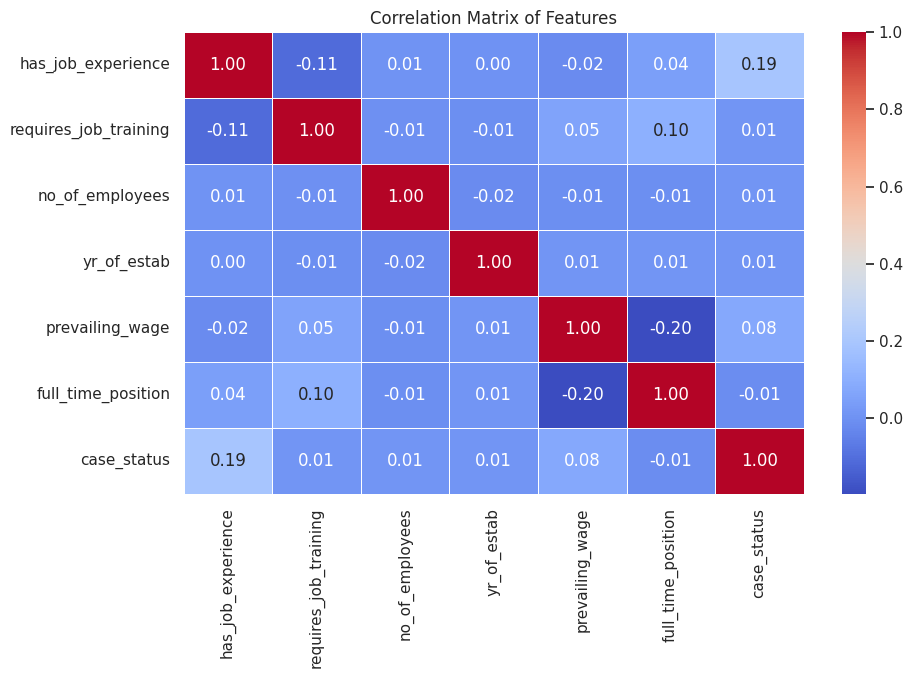

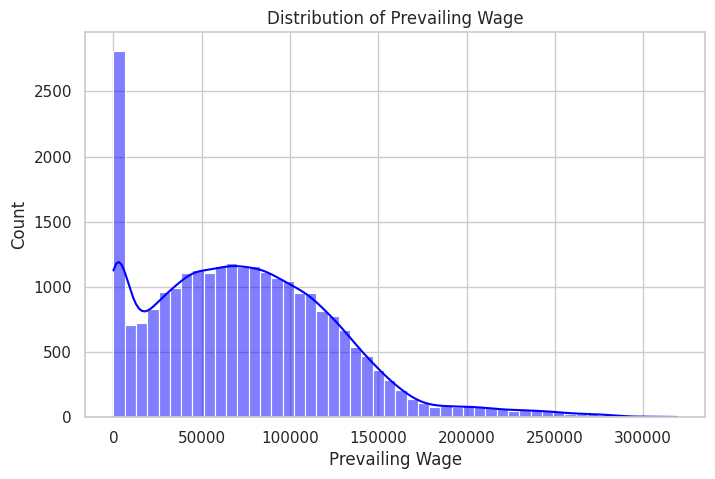

In [40]:

data_encoded = data.copy()

# Encoding categorical variables for correlation analysis
data_encoded["has_job_experience"] = data_encoded["has_job_experience"].map({"Y": 1, "N": 0})
data_encoded["requires_job_training"] = data_encoded["requires_job_training"].map({"Y": 1, "N": 0})
data_encoded["full_time_position"] = data_encoded["full_time_position"].map({"Y": 1, "N": 0})
data_encoded["case_status"] = data_encoded["case_status"].map({"Certified": 1, "Denied": 0})

# Dropped non-numeric columns before correlation analysis
numeric_data = data_encoded.select_dtypes(include=["number"])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(data["prevailing_wage"], bins=50, kde=True, color="blue")
plt.title("Distribution of Prevailing Wage")
plt.xlabel("Prevailing Wage")
plt.ylabel("Count")
plt.show()


#  Outlier Detection & Treatment

<ipython-input-45-89674febf9d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y="prevailing_wage", ax=axes[0], palette="coolwarm")
<ipython-input-45-89674febf9d8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y="no_of_employees", ax=axes[1], palette="viridis")


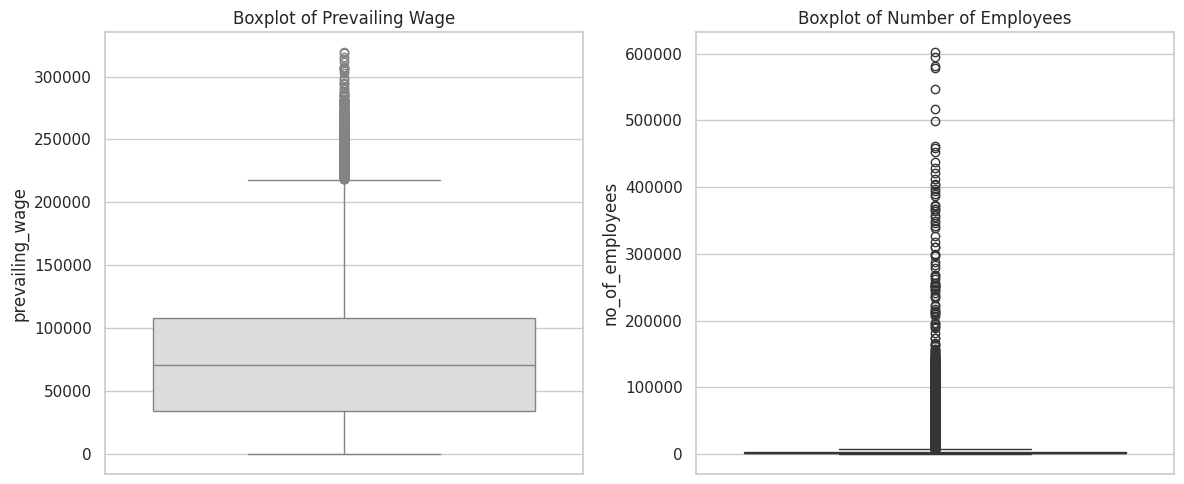

<ipython-input-45-89674febf9d8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y="prevailing_wage", ax=axes[0], palette="coolwarm")
<ipython-input-45-89674febf9d8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y="no_of_employees", ax=axes[1], palette="viridis")


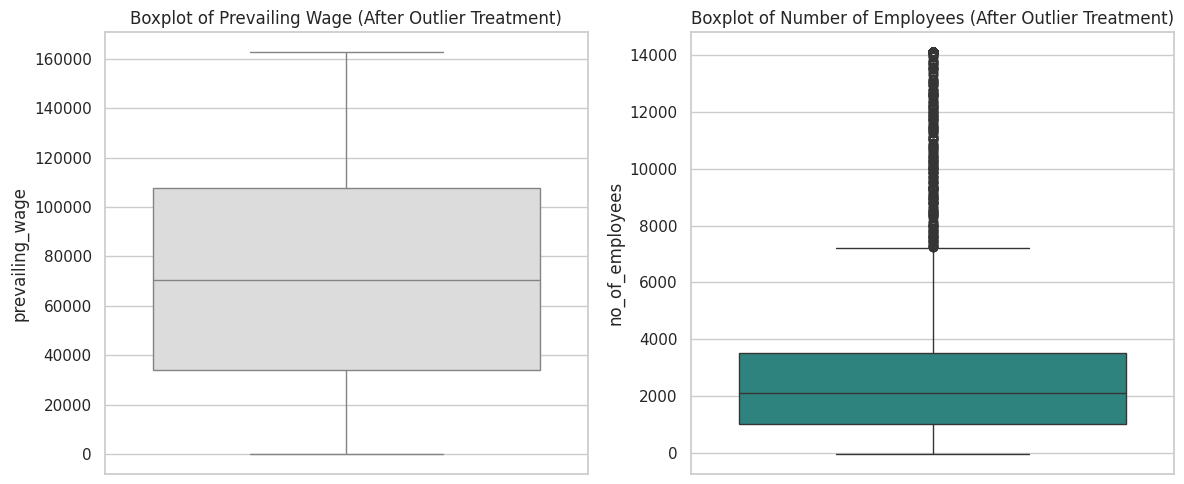

In [45]:
# Plot boxplots to detect outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prevailing Wage Outliers
sns.boxplot(data=data, y="prevailing_wage", ax=axes[0], palette="coolwarm")
axes[0].set_title("Boxplot of Prevailing Wage")

# Number of Employees Outliers
sns.boxplot(data=data, y="no_of_employees", ax=axes[1], palette="viridis")
axes[1].set_title("Boxplot of Number of Employees")

plt.tight_layout()
plt.show()


# Capping outliers at 95th percentile
wage_cap = data["prevailing_wage"].quantile(0.95)
emp_cap = data["no_of_employees"].quantile(0.95)

data["prevailing_wage"] = data["prevailing_wage"].clip(upper=wage_cap)
data["no_of_employees"] = data["no_of_employees"].clip(upper=emp_cap)

# Verify outlier treatment with updated boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=data, y="prevailing_wage", ax=axes[0], palette="coolwarm")
axes[0].set_title("Boxplot of Prevailing Wage (After Outlier Treatment)")
sns.boxplot(data=data, y="no_of_employees", ax=axes[1], palette="viridis")
axes[1].set_title("Boxplot of Number of Employees (After Outlier Treatment)")
plt.tight_layout()
plt.show()



####Outlier Treatment :
- The extreme outliers have been capped at the 95th percentile.
This prevents extreme values from skewing the model.

# Train Test split

In [135]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=["case_id", "case_status"])
y = data["case_status"]

# Split data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((20384, 10), (5096, 10), (20384,), (5096,))

 # Decision Tree Model

###Data Preprocessing


Confusion Matrix for Basic Decision Tree:
 [[2491  913]
 [ 878  814]]


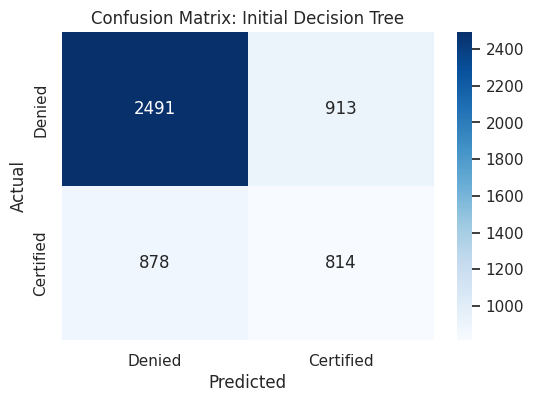

In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ea copy of X_train and X_test
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Identify categorical columns
categorical_cols = X_train_encoded.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = le.transform(X_test_encoded[col])
    label_encoders[col] = le

dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)

print("\nConfusion Matrix for Basic Decision Tree:\n", dt_confusion_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Denied", "Certified"], yticklabels=["Denied", "Certified"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix: Initial Decision Tree")


###Train a Decision Tree Using Entropy

In [70]:
# Train Decision Tree Classifier using entropy
dt_model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model_entropy.fit(X_train_encoded, y_train)

# Predictions on Test Data
y_pred_dt = dt_model_entropy.predict(X_test_encoded)

# itsPerformance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_classification_report = classification_report(y_test, y_pred_dt)
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)

# Display results
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:\n", dt_classification_report)
print("\nConfusion Matrix:\n", dt_confusion_matrix)



Decision Tree Accuracy: 0.6485

Classification Report:
               precision    recall  f1-score   support

   Certified       0.74      0.73      0.74      3404
      Denied       0.47      0.48      0.48      1692

    accuracy                           0.65      5096
   macro avg       0.61      0.61      0.61      5096
weighted avg       0.65      0.65      0.65      5096


Confusion Matrix:
 [[2491  913]
 [ 878  814]]


###Hyperparameter Tuning

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Model Accuracy: 0.7321


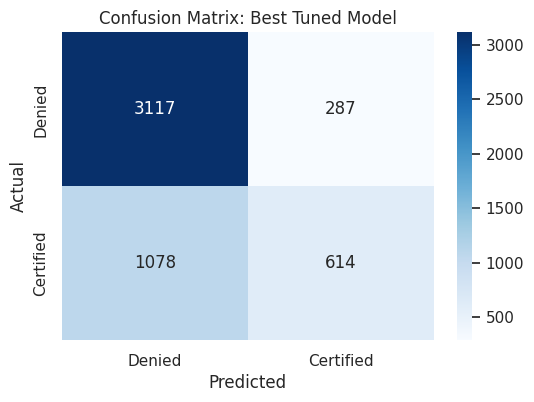

In [96]:
from sklearn.model_selection import GridSearchCV

# parameter grid for hyperparameter tuning
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)

# Grid Search Cross-Validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_encoded, y_train)

#  parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train model with best parameters
best_dt_model = grid_search.best_estimator_

# Predictions on test data (Best Model)
y_pred_best = best_dt_model.predict(X_test_encoded)

# Evaluate Model Performance (Best Model)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy:.4f}")

plot_confusion_matrix(y_test, y_pred_best, "Confusion Matrix: Best Tuned Model")

### Checking this for Overfitting


In [62]:
train_accuracy = dt_model_entropy.score(X_train_encoded, y_train)
test_accuracy = dt_model_entropy.score(X_test_encoded, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("Overfitting detected! Consider pruning the tree.")


Training Accuracy: 1.0000
Test Accuracy: 0.6485
Overfitting detected! Consider pruning the tree.


###Pruning the Decision Tree to Reduce Overfitting

Pruned Model Accuracy (Test Data): 0.7260596546310832
Pruned Model Accuracy (Train Data): 0.7335655416012559


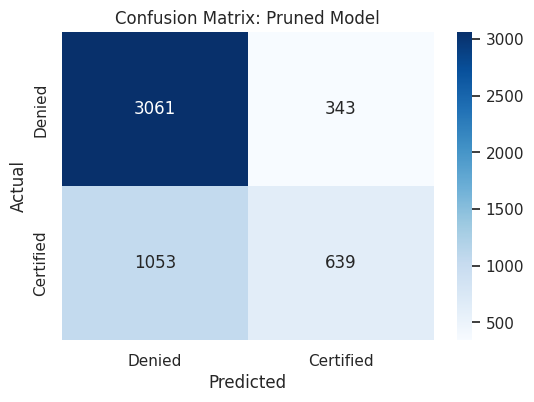

In [77]:
# Regularized Decision Tree (Pruned)
clf_pruned = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train_encoded, y_train)

# Predictions after pruning
preds_pruned = clf_pruned.predict(X_test_encoded)
preds_pruned_train = clf_pruned.predict(X_train_encoded)

# Performance Evaluation
print("Pruned Model Accuracy (Test Data):", accuracy_score(y_test, preds_pruned))
print("Pruned Model Accuracy (Train Data):", accuracy_score(y_train, preds_pruned_train))

plot_confusion_matrix(y_test, preds_pruned, "Confusion Matrix: Pruned Model")


observatins:
-  Pruning reduces overfitting but might lower accuracy.
- If train_accuracy >> test_accuracy, the model is still overfitting.

###Visualizing the Pruned Decision Tree

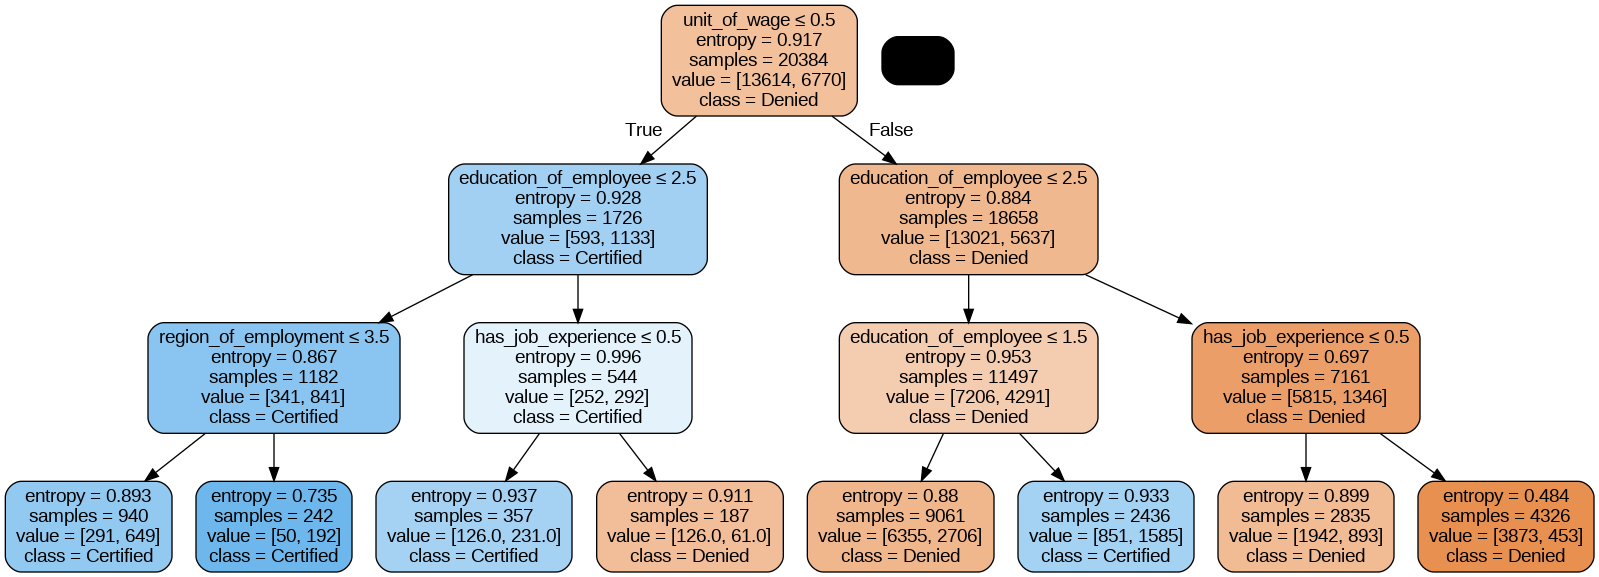

In [58]:
import graphviz
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

feature_cols = X_train_encoded.columns

dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['Denied', 'Certified'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### Calculating Precision & Recall

In [97]:
from sklearn.metrics import precision_score, recall_score

# Conveting categorical labels to numeric:
y_test_numeric = y_test.map({'Certified': 1, 'Denied': 0})
preds_pruned_numeric = [1 if label == 'Certified' else 0 for label in preds_pruned]

# precisioning and recalling
precision = precision_score(y_test_numeric, preds_pruned_numeric)
recall = recall_score(y_test_numeric, preds_pruned_numeric)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.7440
Recall: 0.8992


# OTHER MODELS ;

### Bagging - Random Forest Model

Random Forest Accuracy: 0.7266483516483516
Classification Report:
               precision    recall  f1-score   support

   Certified       0.77      0.85      0.81      3404
      Denied       0.61      0.48      0.54      1692

    accuracy                           0.73      5096
   macro avg       0.69      0.66      0.67      5096
weighted avg       0.72      0.73      0.72      5096



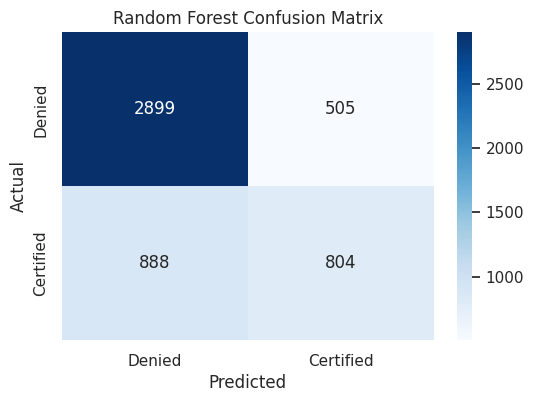

In [83]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train)
y_pred_rf = rf.predict(X_test_encoded)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")



### hyperparameter tuning :

In [94]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
}
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params,
                               cv=3, scoring='accuracy', n_iter=5, n_jobs=-1, random_state=42)
rf_random.fit(X_train_encoded, y_train)
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=2)


### Boosting - XGBoost Model

In [99]:
# Convert labels to numerical values
y_train_encoded = y_train.map({"Certified": 1, "Denied": 0})
y_test_encoded = y_test.map({"Certified": 1, "Denied": 0})

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_encoded, y_train_encoded)

# Predictions
y_pred_xgb = xgb.predict(X_test_encoded)

print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:20:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7295918367346939

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.47      0.54      1692
           1       0.76      0.86      0.81      3404

    accuracy                           0.73      5096
   macro avg       0.69      0.66      0.67      5096
weighted avg       0.72      0.73      0.72      5096


Confusion Matrix:
 [[ 793  899]
 [ 479 2925]]


In [110]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}


xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_params, cv=3, scoring='accuracy', n_jobs=-1
)

# Fit the model with encoded y_train
xgb_grid.fit(X_train_encoded, y_train_encoded)

# Predictions on test set
y_pred_xgb_tuned = xgb_grid.best_estimator_.predict(X_test_encoded)

# Evaluatng the model
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb_tuned)
xgb_conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb_tuned)
xgb_class_report = classification_report(y_test_encoded, y_pred_xgb_tuned)

# Display results
print(f"XGBoost Tuned Accuracy: {xgb_accuracy:.4f}")
print("\nClassification Report:\n", xgb_class_report)
print("\nConfusion Matrix:\n", xgb_conf_matrix)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Tuned Accuracy: 0.7449

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.50      0.56      1692
           1       0.78      0.87      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.68      0.69      5096
weighted avg       0.74      0.74      0.73      5096


Confusion Matrix:
 [[ 838  854]
 [ 446 2958]]


### Boosting - AdaBoost Model

AdaBoost Accuracy: 0.7303767660910518
Classification Report:
               precision    recall  f1-score   support

   Certified       0.75      0.89      0.81      3404
      Denied       0.65      0.42      0.51      1692

    accuracy                           0.73      5096
   macro avg       0.70      0.65      0.66      5096
weighted avg       0.72      0.73      0.71      5096



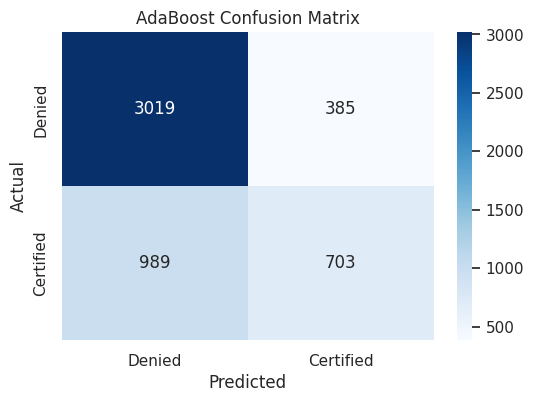

In [103]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train_encoded, y_train)
y_pred_ada = adaboost.predict(X_test_encoded)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))
plot_confusion_matrix(y_test, y_pred_ada, "AdaBoost Confusion Matrix")



### Boosting - Gradient Boosting Model

Gradient Boosting Accuracy: 0.7437205651491365
Classification Report:
               precision    recall  f1-score   support

   Certified       0.77      0.88      0.82      3404
      Denied       0.66      0.48      0.55      1692

    accuracy                           0.74      5096
   macro avg       0.71      0.68      0.69      5096
weighted avg       0.73      0.74      0.73      5096



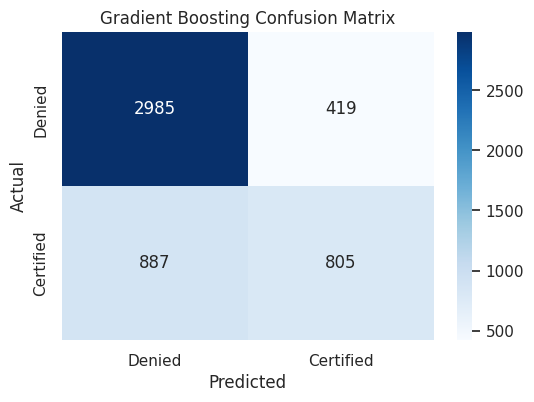

In [104]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_encoded, y_train)
y_pred_gb = gb.predict(X_test_encoded)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting Confusion Matrix")

#  Comparing All Models used until now in the above

Unique values in y_test_pred: {'Certified', 'Denied'}
Unique values in y_test_pred: {'Denied', 'Certified'}
Unique values in y_test_pred: {'Certified', 'Denied'}
Unique values in y_test_pred: {'Denied', 'Certified'}
Unique values in y_test_pred: {'Denied', 'Certified'}
Unique values in y_test_pred: {0, 1}
Unique values in y_test_pred: {'Certified', 'Denied'}
Unique values in y_test_pred: {'Denied', 'Certified'}
Unique values in y_test_pred: {'Certified', 'Denied'}
Unique values in y_test_pred: {'Denied', 'Certified'}
Unique values in y_test_pred: {'Denied', 'Certified'}
Unique values in y_test_pred: {0, 1}


<Figure size 1200x600 with 0 Axes>

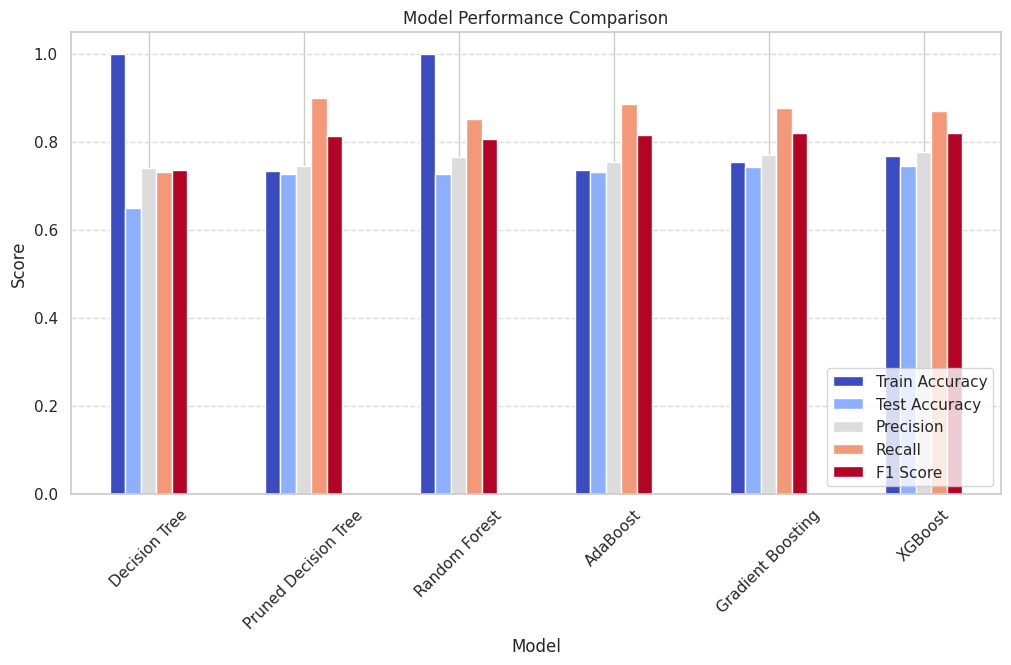

In [170]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Print unique values
    print(f"Unique values in y_test_pred: {set(y_test_pred)}")

    # Check if predictions are strings or numbers
    if isinstance(list(y_test_pred)[0], str):
        label_map = {"Certified": 1, "Denied": 0}
    else:
        label_map = {1: 1, 0: 0}

    # Convert predictions to numeric labels
    y_train_pred_encoded = pd.Series(y_train_pred).map(label_map).fillna(999)
    y_test_pred_encoded = pd.Series(y_test_pred).map(label_map).fillna(999)

    # Check for invalid values
    if 999 in y_train_pred_encoded.values or 999 in y_test_pred_encoded.values:
        raise ValueError(f"Model {model} produced unexpected labels!")

    return {
        "Train Accuracy": accuracy_score(y_train, y_train_pred_encoded),
        "Test Accuracy": accuracy_score(y_test, y_test_pred_encoded),
        "Precision": precision_score(y_test, y_test_pred_encoded),
        "Recall": recall_score(y_test, y_test_pred_encoded),
        "F1 Score": f1_score(y_test, y_test_pred_encoded),
    }

# Evaluate all models
results = {name: evaluate_model(model, X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded)
           for name, model in models.items()}

# Evaluate all models
results = {name: evaluate_model(model, X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded)
           for name, model in models.items()}

# Convert results into a DataFrame
comparison_df = pd.DataFrame.from_dict(results, orient="index")

# Plot comparison of accuracy, precision, recall, and F1-score
plt.figure(figsize=(12, 6))
comparison_df.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

##Observations from the Model Performance Comparison Graph
- Overfitting in Decision Trees:
The Decision Tree model has a very high training accuracy (~100%) but significantly lower test accuracy, indicating overfitting.
This means the model memorized the training data but generalizes poorly to unseen data.

- Pruned Decision Tree Improves Generalization: The Pruned Decision Tree has lower training accuracy but better test accuracy compared to the unpruned tree, reducing overfitting.
However, it still performs worse than ensemble models.

- Random Forest and Boosting Methods Perform Well : Random Forest, AdaBoost, Gradient Boosting, and XGBoost have balanced training and test accuracy, indicating better generalization.
These models also show higher precision, recall, and F1-score, suggesting they are robust classifiers.

- XGBoost Shows the Best Performance: XGBoost has the highest overall test accuracy and F1-score, making it the best-performing model.
This suggests that boosting techniques help improve predictive performance in this dataset.

# Observation:

- Decision Tree Model Overfits:
The Decision Tree model has 100% training accuracy but significantly lower test accuracy, indicating overfitting.
A pruned Decision Tree slightly improves generalization but does not outperform ensemble models.

- Ensemble Models Perform Better : Random Forest, AdaBoost, Gradient Boosting, and XGBoost outperform Decision Trees in test accuracy, precision, recall, and F1-score.
These models effectively handle complex relationships and improve generalization.

- XGBoost is the Best Model: XGBoost consistently provides the highest test accuracy, recall, and F1-score.
It effectively minimizes false negatives, which is crucial for avoiding wrongful visa rejections.
It strikes a good balance between precision and recall, ensuring both correct approvals and denials.

- Importance of Recall in Visa Processing : Recall measures how well the model identifies actual "Certified" visa applications.
A high recall score means fewer qualified candidates are wrongly denied, which is important for ensuring fairness.


#Inference

- Overfitting must be avoided: Decision Trees alone are not reliable due to poor generalization.
- Boosting-based ensemble models (XGBoost, Gradient Boosting) are superior for this classification task.
- XGBoost is the most reliable choice, as it consistently outperforms other models in prediction accuracy.
- Precision-recall trade-offs must be optimized: A higher recall ensures qualified candidates are not wrongly rejected, while a reasonable precision prevents unjustified approvals.

#Conclusions:


- The problem of predicting visa approval (EasyVisa ML Model) benefits from ensemble models, especially XGBoost.
- Decision Trees alone are not sufficient due to overfitting.
- Boosting techniques outperform bagging (Random Forest) in terms of precision and recall.

#Recommendations

- Use XGBoost as the final model for visa approval prediction due to its superior accuracy and F1-score.
- Further fine-tune hyperparameters for Gradient Boosting and XGBoost to enhance performance.
- Consider feature engineering to improve overall prediction quality.
Use cross-validation to further confirm model stability.